### Probability and statistics

In [91]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial


### Example - coin tossing

In [92]:
# preparing samples - by simple python code
number_of_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(number_of_tosses)])
tails = number_of_tosses - heads
print(f"heads, tails: {[heads, tails]}")

heads, tails: [56, 44]


In [93]:
# preparing smaples - by Multinominal object
fair_probability = torch.tensor([0.5, 0.5]) # index[0] - heads, index[1] - tails; we are setting a probability of results of coin tossing
Multinomial(100, fair_probability).sample() # calculate ocurance for 100 samples

tensor([50., 50.])

In [94]:
Multinomial(100, fair_probability).sample() / 100 # dividing by the number of tosses gives us the frequency of each outcome in our data

tensor([0.5800, 0.4200])

In [95]:
# the bigger the number of samples, the more accurate the results are (in case of coin tossing, more thowards our initial probability)
Multinomial(10000, fair_probability).sample() / 10000 # dividing by the number of tosses gives us the frequency of each outcome in our data


tensor([0.5002, 0.4998])

In [96]:
# with notation below we are defining what can occure, eather heads or tails so the range is 0 -> 1 : Multinomial(1,
# then probability of this occurance : Multinomial(1, fair_probability)
# and then how many samples we want to get : Multinomial(1, fair_probability).sample((10000,))
counts = Multinomial(1, fair_probability).sample((10000,))
counts


tensor([[0., 1.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]])

In [97]:
# for 6-sided dice it would be
Multinomial(1, torch.tensor([1/6 for _ in range(6) ])).sample((10000,))
# Multinomial(1, : we expect one side to be visible and rest to be hidden, so 0 for False and 1 for True
# torch.tensor([1/6 for _ in range(6) ]) : we expect that the probabily for occurance of each side is equal, and we have 6 sides
# .sample((10000,)) : number of samples

tensor([[0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0.]])

In [98]:
cumulative_sum = counts.cumsum(dim=0) # Returns the cumulative sum of elements of input in the dimension dim.
estimates = cumulative_sum / cumulative_sum.sum(dim=1, keepdim=True) # Use keepdim=Ture to match the size of tensor b (cumulative_sum)
estimates = estimates.numpy() # Covert tensor to array that will be consumed by pyplot

cumulative_sum, cumulative_sum.sum(dim=1, keepdim=True), estimates

(tensor([[0.0000e+00, 1.0000e+00],
         [1.0000e+00, 1.0000e+00],
         [2.0000e+00, 1.0000e+00],
         ...,
         [5.0260e+03, 4.9720e+03],
         [5.0270e+03, 4.9720e+03],
         [5.0280e+03, 4.9720e+03]]),
 tensor([[1.0000e+00],
         [2.0000e+00],
         [3.0000e+00],
         ...,
         [9.9980e+03],
         [9.9990e+03],
         [1.0000e+04]]),
 array([[0.        , 1.        ],
        [0.5       , 0.5       ],
        [0.6666667 , 0.33333334],
        ...,
        [0.50270057, 0.49729946],
        [0.5027503 , 0.49724972],
        [0.5028    , 0.4972    ]], dtype=float32))

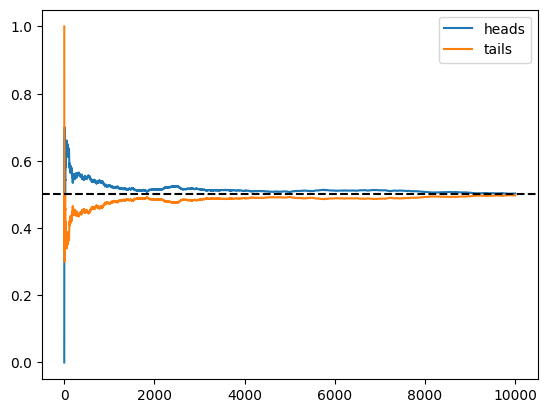

In [99]:
from matplotlib import pyplot

graph = pyplot.gca()
graph.plot(estimates)
graph.legend(["heads", "tails"])
graph.axhline(y=0.5, color="black", linestyle="dashed")